<h1 align="center">Introducción</h1>

Como objetivo en el desarrollo del trabajo practico, lo que buscamos es probar el DataSet con las ingenierias de features que se le habian hecho en el tp1_exploration. En el cual se aplicó, one hot-encoder a las columnas de Sexo, Thalassemia, Chest_Pain_type bajo criterios de discusiones que encontramos de otros usuarios con mas conocimiento en la materia, dentro de las discusiones de kaggle. 
Los modelos en los cuales nos queremos enfocar, son:

<ul>
    <li>Arboles de decisión</li>
    <li>Regresion Logistica</li>
    <li>Redes Neuronales</li>
    <li>Ensemble: Random Forest</li>
</ul>

Correcion: A partir del feedback obtenido decidimos modificar la metrica principal a F1 score, centrandonos principalmente en recall.

<ul>
    <li><strong>Precission</strong> --> Para saber en que porcentaje acertamos las predicciones de que una persona va a tener enfermedad del corazon o no </li>
    <br>
    <li><strong>Recall</strong> --> Ver cuales de esos casos que acertamos, realmente estaban enfermos del corazon sobre la cantidad de enfermos total que habia. La idea de esta eleccion, es porque creemos que es mejor decirle a un paciente sano, que esta enfermo y tome precaucion antes que, este enfermo y se le haya dicho que no lo esta.
</ul>



In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.model_selection import train_test_split

#Metricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
import keras_metrics

#Modelos
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


#Redes Neuronales
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization,Dropout
from IPython.display import Image


Using TensorFlow backend.


In [2]:
#Full va a representar al dataset con ingenieria de features aplicadas en el tp1_exploration.ipynb
full = pd.read_csv("./heart_features.csv", index_col=0)


#Realizamos division en Train y Test del dataset y a su vez el split en x e y de los mismos.
x = full.drop(['target'], axis = 1)
y = full.target.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=5)


x_test.head()


,age,blood_pressure,cholesterol,blood_sugar,result_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,c_major_vessels,sex_female,sex_male,chest_pain_asymptomatic,chest_pain_atypical_angina,chest_pain_non_anginal_pain,chest_pain_typical_angina,thalassemia_fixed_defect,thalassemia_normal,thalassemia_reversable_defect
189,41,110,172,0,0,158,0,0.0,2,0,0,1,1,0,0,0,0,0,1
267,49,118,149,0,0,126,0,0.8,2,3,0,1,0,1,0,0,1,0,0
85,67,115,564,0,0,160,0,1.6,1,0,1,0,0,1,0,0,0,0,1
243,57,152,274,0,1,88,1,1.2,1,1,0,1,1,0,0,0,0,0,1
43,53,130,264,0,0,143,0,0.4,1,0,1,0,1,0,0,0,1,0,0


<h1 align="center">Representación de Modelos:<h1>

<h1>Regresión Logistica</h1>

In [3]:
classifier_LR = LogisticRegression(random_state=4)
classifier_LR.fit(x_train,y_train)

#Prediccion en Train
pred_LR = classifier_LR.predict(x_train)
f1Train_LR = f1_score(y_train, pred_LR)

#Prediccion en Test
pred_LR = classifier_LR.predict(x_test)
confusionMatrix_LR = confusion_matrix(y_test, pred_LR)
accuracyTest_LR = accuracy_score(y_test, pred_LR)
precisionTest_LR = precision_score(y_test, pred_LR)
recallTest_LR = recall_score(y_test, pred_LR)
f1Test_LR = f1_score(y_test, pred_LR)

/home/malta/.venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


F1 Score
Train:	 0.9051094890510948

Test accuracy:	 0.8166666666666667
Test precision:	 0.7352941176470589
Test recall:	 0.9259259259259259
Test f1 score:	 0.819672131147541


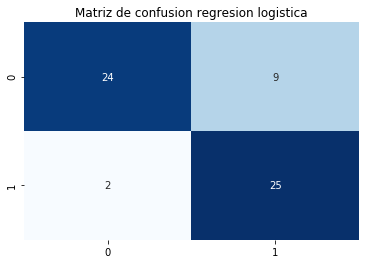

In [15]:
print('\033[1m''\033[4m' + 'F1 Score' + '\033[0m')
print('Train:\t',f1Train_LR)
print('')
print('Test accuracy:\t',accuracyTest_LR)
print('Test precision:\t',precisionTest_LR)
print('Test recall:\t',recallTest_LR)
print('Test f1 score:\t',f1Test_LR)
#plt.subplot(2,3,1) tamaño
plt.title("Matriz de confusion regresion logistica")
sns.heatmap(confusionMatrix_LR ,annot=True,cmap="Blues",fmt="d",cbar=False)

<h3> Conclusión Regresión Logistica </h3>

Como conclusión obtenemos que el 92% de los datos estan bien clasificados como Enfermos de la cantidad de clasificados, lo bueno es que tenemos un recall alto, por lo tanto, se nos escapan pocos datos. 
Como vemos en la matriz de confusion, donde mas fallamos fue cuando no era enfermo, lo clasificamos como enfermo, que es lo que se prefiere ante el fallo. 


<h1> Random Forest </h1>

F1 Score
Train:	 0.973384030418251

Test accuracy:	 0.85
Test precision:	 0.8461538461538461
Test recall:	 0.8148148148148148
Test f1 score:	 0.830188679245283


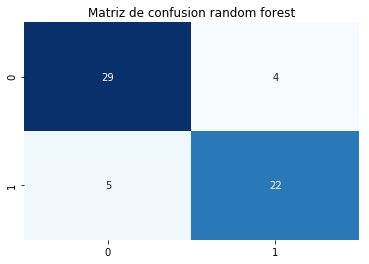

In [16]:
classifier_RDF = RandomForestClassifier(n_estimators=7,criterion='entropy',random_state=4)
classifier_RDF.fit(x_train,y_train)

#Predicción en Train
pred_RDF = classifier_RDF.predict(x_train)
f1Train_RDF = f1_score(y_train, pred_RDF)

#Prediccion en Test
pred_RDF = classifier_RDF.predict(x_test)
confusionMatrix_RDF = confusion_matrix(y_test, pred_RDF)
accuracyTest_RDF = accuracy_score(y_test, pred_RDF)
precisionTest_RDF = precision_score(y_test, pred_RDF)
recallTest_RDF = recall_score(y_test, pred_RDF)
f1Test_RDF = f1_score(y_test, pred_RDF)


print('\033[1m''\033[4m' + 'F1 Score' + '\033[0m')
print('Train:\t',f1Train_RDF)
print('')
print('Test accuracy:\t',accuracyTest_RDF)
print('Test precision:\t',precisionTest_RDF)
print('Test recall:\t',recallTest_RDF)
print('Test f1 score:\t',f1Test_RDF)
plt.title("Matriz de confusion random forest")
sns.heatmap(confusionMatrix_RDF ,annot=True,cmap="Blues",fmt="d",cbar=False)

<h3> Conclusión Random Forest </h3>

Random Forest, nos devuelve resultados bastantes precisos, en comparación a los otros Modelos que vamos a probar. Se puede concluir que es el mas estable, y como se ve en la matriz de confusión, esta bastante balanceados los resultados mal clasificados, lo que puede ser una contra por lo que venimos diciendo, de preferir que a una persona no enferma se la clasifique como enferma.

<h1>DecisionTree Classifier</h1>

F1 Score
Train:	 0.9453125000000001

Test accuracy:	 0.7333333333333333
Test precision:	 0.6666666666666666
Test recall:	 0.8148148148148148
Test f1 score:	 0.7333333333333333


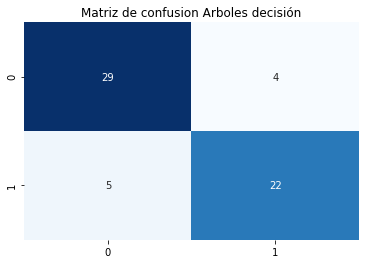

In [17]:
classifier_DTREE = DecisionTreeClassifier(criterion='entropy',random_state=0, max_depth=7,max_features='auto')
classifier_DTREE.fit(x_train,y_train)

#Predicción en Train
pred_DTREE = classifier_DTREE.predict(x_train)
f1Train_DTREE = f1_score(y_train, pred_DTREE)

#Prediccion en Test
pred_DTREE = classifier_DTREE.predict(x_test)
confusionMatrix_DTREE = confusion_matrix(y_test, pred_DTREE)
accuracyTest_DTREE = accuracy_score(y_test, pred_DTREE)
precisionTest_DTREE = precision_score(y_test, pred_DTREE)
recallTest_DTREE = recall_score(y_test, pred_DTREE)
f1Test_DTREE = f1_score(y_test, pred_DTREE)


print('\033[1m''\033[4m' + 'F1 Score' + '\033[0m')
print('Train:\t',f1Train_DTREE)
print('')
print('Test accuracy:\t',accuracyTest_DTREE)
print('Test precision:\t',precisionTest_DTREE)
print('Test recall:\t',recallTest_DTREE)
print('Test f1 score:\t',f1Test_DTREE)

plt.title("Matriz de confusion Arboles decisión")
sns.heatmap(confusionMatrix_RDF ,annot=True,cmap="Blues",fmt="d",cbar=False)

<h3> Conclusión Arboles decision </h3>

Los resultados que arrojan las métricas no son buenos en comparación a una regresión logística o random forest, se probó con diferentes parámetros sin lograr mejorarlas. Dejamos el ejemplo con el cual obtuvimos los mejores resultados.


<h1> KNN </h1>

F1 Score
Train:	 0.7500000000000001

Test accuracy:	 0.6666666666666666
Test precision:	 0.6
Test recall:	 0.7777777777777778
Test f1 score:	 0.6774193548387097


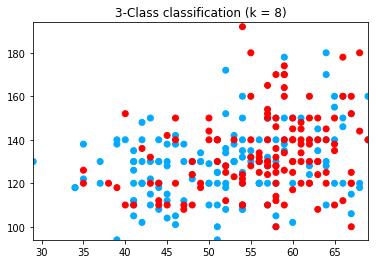

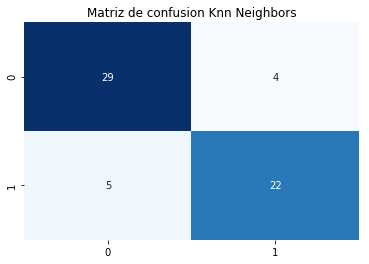

In [18]:
classifier_KNN = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')
classifier_KNN.fit(x_train,y_train)

#Predicción en Train
pred_KNN = classifier_KNN.predict(x_train)
f1Train_KNN = f1_score(y_train, pred_KNN)

#Prediccion en Test
pred_KNN = classifier_KNN.predict(x_test)
confusionMatrix_KNN = confusion_matrix(y_test, pred_KNN)
accuracyTest_KNN = accuracy_score(y_test, pred_KNN)
precisionTest_KNN = precision_score(y_test, pred_KNN)
recallTest_KNN = recall_score(y_test, pred_KNN)
f1Test_KNN = f1_score(y_test, pred_KNN)


print('\033[1m''\033[4m' + 'F1 Score' + '\033[0m')
print('Train:\t',f1Train_KNN)
print('')
print('Test accuracy:\t',accuracyTest_KNN)
print('Test precision:\t',precisionTest_KNN)
print('Test recall:\t',recallTest_KNN)
print('Test f1 score:\t',f1Test_KNN)


# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])

h = 10  # step size in the mesh

# calculate min, max and limits

x_min, x_max = x.iloc[:, 0].min() , x.iloc[:, 0].max() 
y_min, y_max = x.iloc[:, 1].min()  , x.iloc[:, 1].max() +1 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))


# predict class using data and kNN classifier
Z = classifier_KNN.predict(x_test)

# Put the result into a color plot

Z = Z.reshape(x_test.shape[0])
plt.figure()

plt.pcolormesh(x_test, cmap=cmap_light)

# Plot also the training points
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)" % (8))
plt.show()

plt.title("Matriz de confusion Knn Neighbors")
sns.heatmap(confusionMatrix_RDF ,annot=True,cmap="Blues",fmt="d",cbar=False)



<h3>Conclusión KNN</h3>

Knn termina siendo el modelo que peor resultados nos arrojan las metricas, probando varias combinaciones de parámetros no pudimos mejorar los valores. Creemos que la naturaleza del problema no permite que este modelo sea factible de implementar para este caso.

In [19]:
model = Sequential()
model.add(Dense(100, input_dim=19, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(100, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[keras_metrics.precision(), keras_metrics.recall(),keras_metrics.f1_score(),'accuracy'])

In [21]:
output = model.fit(x_train, y_train,validation_split=0.2, epochs=500, batch_size=128)

Train on 188 samples, validate on 48 samples
Epoch 1/500
188/188 [==============================] - 0s 2ms/step - loss: 0.8016 - precision: 0.8182 - recall: 0.0865 - f1_score: 0.1565 - acc: 0.4840 - val_loss: 0.6573 - val_precision: 0.6154 - val_recall: 0.8276 - val_f1_score: 0.7059 - val_acc: 0.5833
Epoch 2/500
188/188 [==============================] - 0s 42us/step - loss: 0.6887 - precision: 0.5752 - recall: 0.8462 - f1_score: 0.6848 - acc: 0.5691 - val_loss: 0.6887 - val_precision: 0.6042 - val_recall: 1.0000 - val_f1_score: 0.7532 - val_acc: 0.6042
Epoch 3/500
188/188 [==============================] - 0s 59us/step - loss: 0.7244 - precision: 0.5538 - recall: 0.9904 - f1_score: 0.7103 - acc: 0.5532 - val_loss: 0.6598 - val_precision: 0.6042 - val_recall: 1.0000 - val_f1_score: 0.7532 - val_acc: 0.6042
Epoch 4/500
188/188 [==============================] - 0s 43us/step - loss: 0.7063 - precision: 0.5691 - recall: 0.9904 - f1_score: 0.7228 - acc: 0.5798 - val_loss: 0.6103 - val_prec

188/188 [==============================] - 0s 53us/step - loss: 0.5434 - precision: 0.7255 - recall: 0.7115 - f1_score: 0.7184 - acc: 0.6915 - val_loss: 0.5862 - val_precision: 0.7931 - val_recall: 0.7931 - val_f1_score: 0.7931 - val_acc: 0.7500
Epoch 33/500
188/188 [==============================] - 0s 67us/step - loss: 0.5669 - precision: 0.7573 - recall: 0.7500 - f1_score: 0.7536 - acc: 0.7287 - val_loss: 0.5820 - val_precision: 0.7931 - val_recall: 0.7931 - val_f1_score: 0.7931 - val_acc: 0.7500
Epoch 34/500
188/188 [==============================] - 0s 49us/step - loss: 0.5137 - precision: 0.7624 - recall: 0.7404 - f1_score: 0.7512 - acc: 0.7287 - val_loss: 0.5711 - val_precision: 0.7500 - val_recall: 0.8276 - val_f1_score: 0.7869 - val_acc: 0.7292
Epoch 35/500
188/188 [==============================] - 0s 53us/step - loss: 0.5450 - precision: 0.7281 - recall: 0.7981 - f1_score: 0.7615 - acc: 0.7234 - val_loss: 0.5642 - val_precision: 0.7273 - val_recall: 0.8276 - val_f1_score: 0.

Epoch 64/500
188/188 [==============================] - 0s 48us/step - loss: 0.4974 - precision: 0.7768 - recall: 0.8365 - f1_score: 0.8056 - acc: 0.7766 - val_loss: 0.5845 - val_precision: 0.7273 - val_recall: 0.8276 - val_f1_score: 0.7742 - val_acc: 0.7083
Epoch 65/500
188/188 [==============================] - 0s 50us/step - loss: 0.4920 - precision: 0.7810 - recall: 0.7885 - f1_score: 0.7847 - acc: 0.7606 - val_loss: 0.6111 - val_precision: 0.7419 - val_recall: 0.7931 - val_f1_score: 0.7667 - val_acc: 0.7083
Epoch 66/500
188/188 [==============================] - 0s 51us/step - loss: 0.5153 - precision: 0.7549 - recall: 0.7404 - f1_score: 0.7476 - acc: 0.7234 - val_loss: 0.6119 - val_precision: 0.7187 - val_recall: 0.7931 - val_f1_score: 0.7541 - val_acc: 0.6875
Epoch 67/500
188/188 [==============================] - 0s 56us/step - loss: 0.4968 - precision: 0.7736 - recall: 0.7885 - f1_score: 0.7810 - acc: 0.7553 - val_loss: 0.5897 - val_precision: 0.7059 - val_recall: 0.8276 - val

Epoch 96/500
188/188 [==============================] - 0s 51us/step - loss: 0.4928 - precision: 0.7624 - recall: 0.7404 - f1_score: 0.7512 - acc: 0.7287 - val_loss: 0.5969 - val_precision: 0.6970 - val_recall: 0.7931 - val_f1_score: 0.7419 - val_acc: 0.6667
Epoch 97/500
188/188 [==============================] - 0s 69us/step - loss: 0.4419 - precision: 0.8000 - recall: 0.8846 - f1_score: 0.8402 - acc: 0.8138 - val_loss: 0.6080 - val_precision: 0.6970 - val_recall: 0.7931 - val_f1_score: 0.7419 - val_acc: 0.6667
Epoch 98/500
188/188 [==============================] - 0s 45us/step - loss: 0.4410 - precision: 0.7885 - recall: 0.7885 - f1_score: 0.7885 - acc: 0.7660 - val_loss: 0.6176 - val_precision: 0.7273 - val_recall: 0.8276 - val_f1_score: 0.7742 - val_acc: 0.7083
Epoch 99/500
188/188 [==============================] - 0s 44us/step - loss: 0.4591 - precision: 0.7778 - recall: 0.7404 - f1_score: 0.7586 - acc: 0.7394 - val_loss: 0.6171 - val_precision: 0.7273 - val_recall: 0.8276 - val

188/188 [==============================] - 0s 52us/step - loss: 0.4463 - precision: 0.7712 - recall: 0.8750 - f1_score: 0.8198 - acc: 0.7872 - val_loss: 0.5978 - val_precision: 0.7500 - val_recall: 0.8276 - val_f1_score: 0.7869 - val_acc: 0.7292
Epoch 128/500
188/188 [==============================] - 0s 47us/step - loss: 0.4323 - precision: 0.8155 - recall: 0.8077 - f1_score: 0.8116 - acc: 0.7926 - val_loss: 0.6261 - val_precision: 0.8214 - val_recall: 0.7931 - val_f1_score: 0.8070 - val_acc: 0.7708
Epoch 129/500
188/188 [==============================] - 0s 60us/step - loss: 0.4429 - precision: 0.8163 - recall: 0.7692 - f1_score: 0.7921 - acc: 0.7766 - val_loss: 0.5943 - val_precision: 0.8276 - val_recall: 0.8276 - val_f1_score: 0.8276 - val_acc: 0.7917
Epoch 130/500
188/188 [==============================] - 0s 56us/step - loss: 0.4398 - precision: 0.8077 - recall: 0.8077 - f1_score: 0.8077 - acc: 0.7872 - val_loss: 0.5533 - val_precision: 0.7059 - val_recall: 0.8276 - val_f1_score:

188/188 [==============================] - 0s 44us/step - loss: 0.3991 - precision: 0.8257 - recall: 0.8654 - f1_score: 0.8451 - acc: 0.8245 - val_loss: 0.5965 - val_precision: 0.8519 - val_recall: 0.7931 - val_f1_score: 0.8214 - val_acc: 0.7917
Epoch 159/500
188/188 [==============================] - 0s 54us/step - loss: 0.4195 - precision: 0.8396 - recall: 0.8558 - f1_score: 0.8476 - acc: 0.8298 - val_loss: 0.5898 - val_precision: 0.8519 - val_recall: 0.7931 - val_f1_score: 0.8214 - val_acc: 0.7917
Epoch 160/500
188/188 [==============================] - 0s 61us/step - loss: 0.4462 - precision: 0.8155 - recall: 0.8077 - f1_score: 0.8116 - acc: 0.7926 - val_loss: 0.5664 - val_precision: 0.8000 - val_recall: 0.8276 - val_f1_score: 0.8136 - val_acc: 0.7708
Epoch 161/500
188/188 [==============================] - 0s 46us/step - loss: 0.3948 - precision: 0.8087 - recall: 0.8942 - f1_score: 0.8493 - acc: 0.8245 - val_loss: 0.5596 - val_precision: 0.8214 - val_recall: 0.7931 - val_f1_score:

188/188 [==============================] - 0s 44us/step - loss: 0.3722 - precision: 0.8349 - recall: 0.8750 - f1_score: 0.8545 - acc: 0.8351 - val_loss: 0.5324 - val_precision: 0.8276 - val_recall: 0.8276 - val_f1_score: 0.8276 - val_acc: 0.7917
Epoch 190/500
188/188 [==============================] - 0s 53us/step - loss: 0.3928 - precision: 0.8349 - recall: 0.8750 - f1_score: 0.8545 - acc: 0.8351 - val_loss: 0.5312 - val_precision: 0.7931 - val_recall: 0.7931 - val_f1_score: 0.7931 - val_acc: 0.7500
Epoch 191/500
188/188 [==============================] - 0s 70us/step - loss: 0.3261 - precision: 0.8532 - recall: 0.8942 - f1_score: 0.8732 - acc: 0.8564 - val_loss: 0.5459 - val_precision: 0.7931 - val_recall: 0.7931 - val_f1_score: 0.7931 - val_acc: 0.7500
Epoch 192/500
188/188 [==============================] - 0s 57us/step - loss: 0.3478 - precision: 0.8654 - recall: 0.8654 - f1_score: 0.8654 - acc: 0.8511 - val_loss: 0.5650 - val_precision: 0.8077 - val_recall: 0.7241 - val_f1_score:

188/188 [==============================] - 0s 64us/step - loss: 0.3675 - precision: 0.7983 - recall: 0.9135 - f1_score: 0.8520 - acc: 0.8245 - val_loss: 0.4994 - val_precision: 0.8929 - val_recall: 0.8621 - val_f1_score: 0.8772 - val_acc: 0.8542
Epoch 221/500
188/188 [==============================] - 0s 54us/step - loss: 0.3352 - precision: 0.8496 - recall: 0.9231 - f1_score: 0.8848 - acc: 0.8670 - val_loss: 0.5041 - val_precision: 0.8929 - val_recall: 0.8621 - val_f1_score: 0.8772 - val_acc: 0.8542
Epoch 222/500
188/188 [==============================] - 0s 52us/step - loss: 0.3347 - precision: 0.8627 - recall: 0.8462 - f1_score: 0.8544 - acc: 0.8404 - val_loss: 0.5155 - val_precision: 0.8929 - val_recall: 0.8621 - val_f1_score: 0.8333 - val_acc: 0.8542
Epoch 223/500
188/188 [==============================] - 0s 57us/step - loss: 0.3440 - precision: 0.8519 - recall: 0.8846 - f1_score: 0.8679 - acc: 0.8511 - val_loss: 0.5360 - val_precision: 0.7812 - val_recall: 0.8621 - val_f1_score:

188/188 [==============================] - 0s 50us/step - loss: 0.3416 - precision: 0.8411 - recall: 0.8654 - f1_score: 0.8531 - acc: 0.8351 - val_loss: 0.5008 - val_precision: 0.8571 - val_recall: 0.8276 - val_f1_score: 0.8421 - val_acc: 0.8125
Epoch 252/500
188/188 [==============================] - 0s 56us/step - loss: 0.3297 - precision: 0.8333 - recall: 0.9135 - f1_score: 0.8716 - acc: 0.8511 - val_loss: 0.5047 - val_precision: 0.9231 - val_recall: 0.8276 - val_f1_score: 0.8727 - val_acc: 0.8542
Epoch 253/500
188/188 [==============================] - 0s 50us/step - loss: 0.3557 - precision: 0.8800 - recall: 0.8462 - f1_score: 0.8627 - acc: 0.8511 - val_loss: 0.5108 - val_precision: 0.9231 - val_recall: 0.8276 - val_f1_score: 0.8889 - val_acc: 0.8542
Epoch 254/500
188/188 [==============================] - 0s 50us/step - loss: 0.3069 - precision: 0.8532 - recall: 0.8942 - f1_score: 0.8732 - acc: 0.8564 - val_loss: 0.5010 - val_precision: 0.8621 - val_recall: 0.8621 - val_f1_score:

188/188 [==============================] - 0s 58us/step - loss: 0.2889 - precision: 0.8889 - recall: 0.9231 - f1_score: 0.9057 - acc: 0.8936 - val_loss: 0.5016 - val_precision: 0.8571 - val_recall: 0.8276 - val_f1_score: 0.8421 - val_acc: 0.8125
Epoch 283/500
188/188 [==============================] - 0s 56us/step - loss: 0.2480 - precision: 0.8818 - recall: 0.9327 - f1_score: 0.9065 - acc: 0.8936 - val_loss: 0.4862 - val_precision: 0.8929 - val_recall: 0.8621 - val_f1_score: 0.8772 - val_acc: 0.8542
Epoch 284/500
188/188 [==============================] - 0s 69us/step - loss: 0.2395 - precision: 0.8991 - recall: 0.9423 - f1_score: 0.9202 - acc: 0.9096 - val_loss: 0.4826 - val_precision: 0.8929 - val_recall: 0.8621 - val_f1_score: 0.8772 - val_acc: 0.8542
Epoch 285/500
188/188 [==============================] - 0s 61us/step - loss: 0.3142 - precision: 0.8866 - recall: 0.8269 - f1_score: 0.8557 - acc: 0.8457 - val_loss: 0.4836 - val_precision: 0.8621 - val_recall: 0.8621 - val_f1_score:

188/188 [==============================] - 0s 55us/step - loss: 0.2618 - precision: 0.8835 - recall: 0.8750 - f1_score: 0.8792 - acc: 0.8670 - val_loss: 0.4959 - val_precision: 0.8621 - val_recall: 0.8621 - val_f1_score: 0.8621 - val_acc: 0.8333
Epoch 314/500
188/188 [==============================] - 0s 60us/step - loss: 0.2305 - precision: 0.9159 - recall: 0.9423 - f1_score: 0.9289 - acc: 0.9202 - val_loss: 0.4982 - val_precision: 0.8621 - val_recall: 0.8621 - val_f1_score: 0.8621 - val_acc: 0.8333
Epoch 315/500
188/188 [==============================] - 0s 79us/step - loss: 0.2442 - precision: 0.9048 - recall: 0.9135 - f1_score: 0.9091 - acc: 0.8989 - val_loss: 0.4929 - val_precision: 0.8621 - val_recall: 0.8621 - val_f1_score: 0.8621 - val_acc: 0.8333
Epoch 316/500
188/188 [==============================] - 0s 57us/step - loss: 0.2411 - precision: 0.9151 - recall: 0.9327 - f1_score: 0.9238 - acc: 0.9149 - val_loss: 0.4905 - val_precision: 0.8621 - val_recall: 0.8621 - val_f1_score:

188/188 [==============================] - 0s 50us/step - loss: 0.2415 - precision: 0.8952 - recall: 0.9038 - f1_score: 0.8995 - acc: 0.8883 - val_loss: 0.5195 - val_precision: 0.8929 - val_recall: 0.8621 - val_f1_score: 0.8772 - val_acc: 0.8542
Epoch 345/500
188/188 [==============================] - 0s 65us/step - loss: 0.2021 - precision: 0.9333 - recall: 0.9423 - f1_score: 0.9378 - acc: 0.9309 - val_loss: 0.5219 - val_precision: 0.8929 - val_recall: 0.8621 - val_f1_score: 0.8772 - val_acc: 0.8542
Epoch 346/500
188/188 [==============================] - 0s 41us/step - loss: 0.2284 - precision: 0.9159 - recall: 0.9423 - f1_score: 0.9289 - acc: 0.9202 - val_loss: 0.5304 - val_precision: 0.8929 - val_recall: 0.8621 - val_f1_score: 0.8772 - val_acc: 0.8542
Epoch 347/500
188/188 [==============================] - 0s 70us/step - loss: 0.2396 - precision: 0.9143 - recall: 0.9231 - f1_score: 0.9187 - acc: 0.9096 - val_loss: 0.5332 - val_precision: 0.8929 - val_recall: 0.8621 - val_f1_score:

188/188 [==============================] - 0s 49us/step - loss: 0.2294 - precision: 0.9394 - recall: 0.8942 - f1_score: 0.9163 - acc: 0.9096 - val_loss: 0.5134 - val_precision: 0.8571 - val_recall: 0.8276 - val_f1_score: 0.8727 - val_acc: 0.8125
Epoch 376/500
188/188 [==============================] - 0s 53us/step - loss: 0.2409 - precision: 0.8879 - recall: 0.9135 - f1_score: 0.9005 - acc: 0.8883 - val_loss: 0.5175 - val_precision: 0.8065 - val_recall: 0.8621 - val_f1_score: 0.8333 - val_acc: 0.7917
Epoch 377/500
188/188 [==============================] - 0s 61us/step - loss: 0.2582 - precision: 0.8807 - recall: 0.9231 - f1_score: 0.9014 - acc: 0.8883 - val_loss: 0.5107 - val_precision: 0.8333 - val_recall: 0.8621 - val_f1_score: 0.8475 - val_acc: 0.8125
Epoch 378/500
188/188 [==============================] - 0s 48us/step - loss: 0.1951 - precision: 0.9167 - recall: 0.9519 - f1_score: 0.9340 - acc: 0.9255 - val_loss: 0.5100 - val_precision: 0.8929 - val_recall: 0.8621 - val_f1_score:

188/188 [==============================] - 0s 41us/step - loss: 0.1836 - precision: 0.9245 - recall: 0.9423 - f1_score: 0.9333 - acc: 0.9255 - val_loss: 0.5401 - val_precision: 0.8621 - val_recall: 0.8621 - val_f1_score: 0.8621 - val_acc: 0.8333
Epoch 407/500
188/188 [==============================] - 0s 53us/step - loss: 0.2125 - precision: 0.8684 - recall: 0.9519 - f1_score: 0.9083 - acc: 0.8936 - val_loss: 0.5560 - val_precision: 0.8621 - val_recall: 0.8621 - val_f1_score: 0.8621 - val_acc: 0.8333
Epoch 408/500
188/188 [==============================] - 0s 59us/step - loss: 0.2731 - precision: 0.8942 - recall: 0.8942 - f1_score: 0.8942 - acc: 0.8830 - val_loss: 0.5616 - val_precision: 0.8571 - val_recall: 0.8276 - val_f1_score: 0.8421 - val_acc: 0.8125
Epoch 409/500
188/188 [==============================] - 0s 56us/step - loss: 0.2166 - precision: 0.9231 - recall: 0.9231 - f1_score: 0.9231 - acc: 0.9149 - val_loss: 0.5581 - val_precision: 0.8571 - val_recall: 0.8276 - val_f1_score:

188/188 [==============================] - 0s 52us/step - loss: 0.2151 - precision: 0.8839 - recall: 0.9519 - f1_score: 0.9167 - acc: 0.9043 - val_loss: 0.5664 - val_precision: 0.8846 - val_recall: 0.7931 - val_f1_score: 0.8364 - val_acc: 0.8125
Epoch 438/500
188/188 [==============================] - 0s 48us/step - loss: 0.2297 - precision: 0.9135 - recall: 0.9135 - f1_score: 0.9135 - acc: 0.9043 - val_loss: 0.5688 - val_precision: 0.8889 - val_recall: 0.8276 - val_f1_score: 0.8571 - val_acc: 0.8333
Epoch 439/500
188/188 [==============================] - 0s 70us/step - loss: 0.2018 - precision: 0.9505 - recall: 0.9231 - f1_score: 0.9366 - acc: 0.9309 - val_loss: 0.5871 - val_precision: 0.8065 - val_recall: 0.8621 - val_f1_score: 0.8333 - val_acc: 0.7917
Epoch 440/500
188/188 [==============================] - 0s 52us/step - loss: 0.2045 - precision: 0.8919 - recall: 0.9519 - f1_score: 0.9209 - acc: 0.9096 - val_loss: 0.5985 - val_precision: 0.8065 - val_recall: 0.8621 - val_f1_score:

188/188 [==============================] - 0s 61us/step - loss: 0.2173 - precision: 0.9018 - recall: 0.9712 - f1_score: 0.9352 - acc: 0.9255 - val_loss: 0.5832 - val_precision: 0.8621 - val_recall: 0.8621 - val_f1_score: 0.8621 - val_acc: 0.8333
Epoch 469/500
188/188 [==============================] - 0s 51us/step - loss: 0.2086 - precision: 0.9143 - recall: 0.9231 - f1_score: 0.9187 - acc: 0.9096 - val_loss: 0.5769 - val_precision: 0.8621 - val_recall: 0.8621 - val_f1_score: 0.8621 - val_acc: 0.8333
Epoch 470/500
188/188 [==============================] - 0s 44us/step - loss: 0.1884 - precision: 0.9429 - recall: 0.9519 - f1_score: 0.9474 - acc: 0.9415 - val_loss: 0.5624 - val_precision: 0.8621 - val_recall: 0.8621 - val_f1_score: 0.8621 - val_acc: 0.8333
Epoch 471/500
188/188 [==============================] - 0s 64us/step - loss: 0.2301 - precision: 0.8829 - recall: 0.9423 - f1_score: 0.9116 - acc: 0.8989 - val_loss: 0.5454 - val_precision: 0.8621 - val_recall: 0.8621 - val_f1_score:

188/188 [==============================] - 0s 59us/step - loss: 0.1739 - precision: 0.9429 - recall: 0.9519 - f1_score: 0.9474 - acc: 0.9415 - val_loss: 0.6042 - val_precision: 0.8621 - val_recall: 0.8621 - val_f1_score: 0.8621 - val_acc: 0.8333
Epoch 500/500
188/188 [==============================] - 0s 49us/step - loss: 0.1844 - precision: 0.9510 - recall: 0.9327 - f1_score: 0.9417 - acc: 0.9362 - val_loss: 0.5888 - val_precision: 0.8621 - val_recall: 0.8621 - val_f1_score: 0.8621 - val_acc: 0.8333


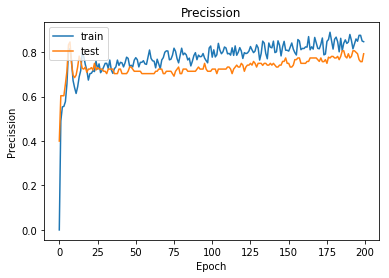

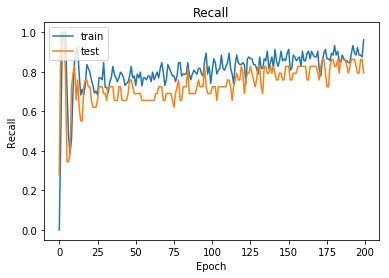

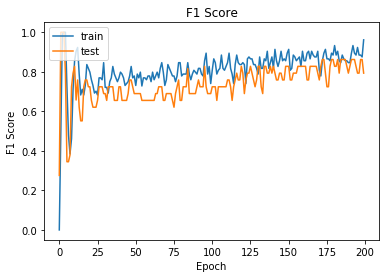

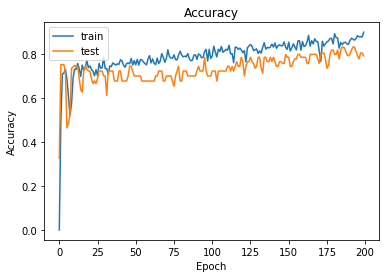

In [11]:
plt.plot(output.history['precision'], label='train')
plt.plot(output.history['val_precision'], label='test')
plt.title('Precission')
plt.ylabel('Precission')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

plt.plot(output.history['recall'], label='train')
plt.plot(output.history['val_recall'], label='test')
plt.title('Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

plt.plot(output.history['recall'], label='train')
plt.plot(output.history['val_recall'], label='test')
plt.title('F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

plt.plot(output.history['f1_score'], label='train')
plt.plot(output.history['val_f1_score'], label='test')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

<h3>Conclusión Redes Neuronales</h3>
    
Si nos fijamos especificamente en la métrica precission, podemos concluir que es el modelo que mejor resultados logró, con un 89%. Hicimos varias pruebas con distinta cantidad de capas, épocas, algoritmos, batch_size, asumimos que el espectro de parametros a cambiar es bastante grandes y seguramente con mas conocimiento en el area podemos llegar a obtener valores mas precisos. Luego de varias pruebas, ese 89% de precission y ademas buenos resultados en las otras métricas, nos deja sastifechos para definir a las redes Neuronales como el mejor modelo de los probados en el trabajo.

<h3> Prueba Comparativa de resultados sin ingenieria de features </h3>

In [22]:
#Dataset sin ingenieria de features
full_wf = pd.read_csv("./heart.csv")

x_wf = full_wf.drop(['target'], axis = 1)
y_wf = full_wf.target.values
X_train, X_test, Y_train, Y_test = train_test_split(x_wf, y_wf, test_size = 0.2, random_state=5)

X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2
215,43,0,0,132,341,1,0,136,1,3.0,1,0,3
99,53,1,2,130,246,1,0,173,0,0.0,2,3,2
119,46,0,0,138,243,0,0,152,1,0.0,1,0,2
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2


In [26]:
#LOGISTIC REGRESSION
classifierWF_LR = LogisticRegression(random_state=4)
classifierWF_LR.fit(X_train,Y_train)

#Prediccion en Train
predWF_LR = classifierWF_LR.predict(X_train)
f1TrainWF_LR = f1_score(Y_train, predWF_LR)

#Prediccion en Test
predWF_LR = classifierWF_LR.predict(X_test)
accuracyTestWF_LR = accuracy_score(Y_test, predWF_LR)
precisionTestWF_LR = precision_score(Y_test, predWF_LR)
recallTestWF_LR = recall_score(Y_test, predWF_LR)
f1TestWF_LR = f1_score(Y_test, predWF_LR)


#RANDOM FOREST
classifierWF_RDF = RandomForestClassifier(n_estimators=7,criterion='entropy',random_state=4)
classifierWF_RDF.fit(X_train,Y_train)

#Predicción en Train
predWF_RDF = classifierWF_RDF.predict(X_train)
f1TrainWF_RDF = f1_score(Y_train, predWF_RDF)

#Prediccion en Test
predWF_RDF = classifierWF_RDF.predict(X_test)
accuracyTestWF_RDF = accuracy_score(Y_test, predWF_RDF)
precisionTestWF_RDF= precision_score(Y_test, predWF_RDF)
recallTestWF_RDF = recall_score(Y_test, predWF_RDF)
f1TestWF_RDF = f1_score(Y_test, predWF_RDF)

#KNN NEIGHBORS
classifierWF_KNN = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')
classifierWF_KNN.fit(X_train,Y_train)

#Predicción en Train
predWF_KNN = classifierWF_KNN.predict(X_train)
f1TrainWF_KNN = f1_score(Y_train, predWF_KNN)

#Prediccion en Test
predWF_KNN = classifierWF_KNN.predict(X_test)
accuracyTestWF_KNN = accuracy_score(Y_test, predWF_KNN)
precisionTestWF_KNN= precision_score(Y_test, predWF_KNN)
recallTestWF_KNN = recall_score(Y_test, predWF_KNN)
f1TestWF_KNN = f1_score(Y_test, predWF_KNN)

#REDES NEURONALES
modelWF = Sequential()
modelWF.add(Dense(100, input_dim=13, activation='tanh'))
modelWF.add(Dropout(0.1))
modelWF.add(Dense(100, activation='tanh'))
modelWF.add(Dense(1, activation='sigmoid'))

modelWF.compile(loss='binary_crossentropy', optimizer='adam', metrics=[keras_metrics.precision(), keras_metrics.recall(),'accuracy', keras_metrics.f1_score()])

outputWF = modelWF.fit(X_train, Y_train,validation_split=0.2, epochs=500, batch_size=128)

/home/malta/.venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train on 193 samples, validate on 49 samples
Epoch 1/500
193/193 [==============================] - 0s 2ms/step - loss: 0.6889 - precision: 0.5850 - recall: 0.8190 - acc: 0.5855 - f1_score: 0.6825 - val_loss: 0.6506 - val_precision: 0.7727 - val_recall: 0.5862 - val_acc: 0.6531 - val_f1_score: 0.6667
Epoch 2/500
193/193 [==============================] - 0s 45us/step - loss: 0.6825 - precision: 0.6061 - recall: 0.5714 - acc: 0.5648 - f1_score: 0.5882 - val_loss: 0.6295 - val_precision: 0.6579 - val_recall: 0.8621 - val_acc: 0.6531 - val_f1_score: 0.7463
Epoch 3/500
193/193 [==============================] - 0s 42us/step - loss: 0.6734 - precision: 0.5942 - recall: 0.7810 - acc: 0.5907 - f1_score: 0.6749 - val_loss: 0.6229 - val_precision: 0.6585 - val_recall: 0.9310 - val_acc: 0.6735 - val_f1_score: 0.7714
Epoch 4/500
193/193 [==============================] - 0s 53us/step - loss: 0.6310 - precision: 0.6214 - recall: 0.8286 - acc: 0.6321 - f1_score: 0.7102 - val_loss: 0.6234 - val_prec

193/193 [==============================] - 0s 47us/step - loss: 0.5318 - precision: 0.7407 - recall: 0.7619 - acc: 0.7254 - f1_score: 0.7512 - val_loss: 0.6125 - val_precision: 0.6970 - val_recall: 0.7931 - val_acc: 0.6735 - val_f1_score: 0.7419
Epoch 33/500
193/193 [==============================] - 0s 65us/step - loss: 0.5207 - precision: 0.7565 - recall: 0.8286 - acc: 0.7617 - f1_score: 0.7909 - val_loss: 0.6139 - val_precision: 0.6970 - val_recall: 0.7931 - val_acc: 0.6735 - val_f1_score: 0.7419
Epoch 34/500
193/193 [==============================] - 0s 55us/step - loss: 0.5199 - precision: 0.7500 - recall: 0.8286 - acc: 0.7565 - f1_score: 0.7873 - val_loss: 0.6115 - val_precision: 0.6774 - val_recall: 0.7241 - val_acc: 0.6327 - val_f1_score: 0.7000
Epoch 35/500
193/193 [==============================] - 0s 83us/step - loss: 0.5231 - precision: 0.7745 - recall: 0.7524 - acc: 0.7461 - f1_score: 0.7633 - val_loss: 0.6100 - val_precision: 0.6875 - val_recall: 0.7586 - val_acc: 0.6531 

Epoch 64/500
193/193 [==============================] - 0s 48us/step - loss: 0.4994 - precision: 0.7431 - recall: 0.7714 - acc: 0.7306 - f1_score: 0.7570 - val_loss: 0.6049 - val_precision: 0.6970 - val_recall: 0.7931 - val_acc: 0.6735 - val_f1_score: 0.7419
Epoch 65/500
193/193 [==============================] - 0s 49us/step - loss: 0.4679 - precision: 0.7459 - recall: 0.8667 - acc: 0.7668 - f1_score: 0.8018 - val_loss: 0.6056 - val_precision: 0.6970 - val_recall: 0.7931 - val_acc: 0.6735 - val_f1_score: 0.7419
Epoch 66/500
193/193 [==============================] - 0s 56us/step - loss: 0.5005 - precision: 0.7311 - recall: 0.8286 - acc: 0.7409 - f1_score: 0.7768 - val_loss: 0.5994 - val_precision: 0.7857 - val_recall: 0.7586 - val_acc: 0.7347 - val_f1_score: 0.7719
Epoch 67/500
193/193 [==============================] - 0s 66us/step - loss: 0.4717 - precision: 0.7961 - recall: 0.7810 - acc: 0.7720 - f1_score: 0.7628 - val_loss: 0.6023 - val_precision: 0.7586 - val_recall: 0.7586 - val

Epoch 96/500
193/193 [==============================] - 0s 50us/step - loss: 0.4385 - precision: 0.7731 - recall: 0.8762 - acc: 0.7927 - f1_score: 0.8214 - val_loss: 0.5985 - val_precision: 0.7059 - val_recall: 0.8276 - val_acc: 0.6939 - val_f1_score: 0.7619
Epoch 97/500
193/193 [==============================] - 0s 49us/step - loss: 0.4522 - precision: 0.7686 - recall: 0.8857 - acc: 0.7927 - f1_score: 0.8230 - val_loss: 0.5712 - val_precision: 0.7931 - val_recall: 0.7931 - val_acc: 0.7551 - val_f1_score: 0.7931
Epoch 98/500
193/193 [==============================] - 0s 48us/step - loss: 0.4701 - precision: 0.7912 - recall: 0.6857 - acc: 0.7306 - f1_score: 0.7347 - val_loss: 0.5716 - val_precision: 0.8077 - val_recall: 0.7241 - val_acc: 0.7347 - val_f1_score: 0.7636
Epoch 99/500
193/193 [==============================] - 0s 59us/step - loss: 0.4376 - precision: 0.8367 - recall: 0.7810 - acc: 0.7979 - f1_score: 0.7923 - val_loss: 0.5803 - val_precision: 0.7273 - val_recall: 0.8276 - val

193/193 [==============================] - 0s 54us/step - loss: 0.3959 - precision: 0.8696 - recall: 0.7619 - acc: 0.8083 - f1_score: 0.8122 - val_loss: 0.5045 - val_precision: 0.8000 - val_recall: 0.8276 - val_acc: 0.7755 - val_f1_score: 0.8136
Epoch 128/500
193/193 [==============================] - 0s 78us/step - loss: 0.3698 - precision: 0.8364 - recall: 0.8762 - acc: 0.8394 - f1_score: 0.8558 - val_loss: 0.5200 - val_precision: 0.7941 - val_recall: 0.9310 - val_acc: 0.8163 - val_f1_score: 0.8571
Epoch 129/500
193/193 [==============================] - 0s 53us/step - loss: 0.3890 - precision: 0.7920 - recall: 0.9429 - acc: 0.8342 - f1_score: 0.8609 - val_loss: 0.5007 - val_precision: 0.8000 - val_recall: 0.8276 - val_acc: 0.7755 - val_f1_score: 0.8136
Epoch 130/500
193/193 [==============================] - 0s 53us/step - loss: 0.3796 - precision: 0.8269 - recall: 0.8190 - acc: 0.8083 - f1_score: 0.8230 - val_loss: 0.5026 - val_precision: 0.7857 - val_recall: 0.7586 - val_acc: 0.73

193/193 [==============================] - 0s 56us/step - loss: 0.3710 - precision: 0.8462 - recall: 0.8381 - acc: 0.8290 - f1_score: 0.8421 - val_loss: 0.4823 - val_precision: 0.7931 - val_recall: 0.7931 - val_acc: 0.7551 - val_f1_score: 0.7931
Epoch 159/500
193/193 [==============================] - 0s 53us/step - loss: 0.3501 - precision: 0.8519 - recall: 0.8762 - acc: 0.8497 - f1_score: 0.8638 - val_loss: 0.4887 - val_precision: 0.7812 - val_recall: 0.8621 - val_acc: 0.7755 - val_f1_score: 0.8197
Epoch 160/500
193/193 [==============================] - 0s 50us/step - loss: 0.3675 - precision: 0.8407 - recall: 0.9048 - acc: 0.8549 - f1_score: 0.8716 - val_loss: 0.5020 - val_precision: 0.7714 - val_recall: 0.9310 - val_acc: 0.7959 - val_f1_score: 0.8437
Epoch 161/500
193/193 [==============================] - 0s 54us/step - loss: 0.3843 - precision: 0.7951 - recall: 0.9238 - acc: 0.8290 - f1_score: 0.8546 - val_loss: 0.4923 - val_precision: 0.7742 - val_recall: 0.8276 - val_acc: 0.75

193/193 [==============================] - 0s 43us/step - loss: 0.3749 - precision: 0.8261 - recall: 0.9048 - acc: 0.8446 - f1_score: 0.8636 - val_loss: 0.4802 - val_precision: 0.7500 - val_recall: 0.8276 - val_acc: 0.7347 - val_f1_score: 0.7869
Epoch 190/500
193/193 [==============================] - 0s 54us/step - loss: 0.3633 - precision: 0.8246 - recall: 0.8952 - acc: 0.8394 - f1_score: 0.8584 - val_loss: 0.4762 - val_precision: 0.7931 - val_recall: 0.7931 - val_acc: 0.7551 - val_f1_score: 0.7931
Epoch 191/500
193/193 [==============================] - 0s 47us/step - loss: 0.3364 - precision: 0.8407 - recall: 0.9048 - acc: 0.8549 - f1_score: 0.8716 - val_loss: 0.4906 - val_precision: 0.7576 - val_recall: 0.8621 - val_acc: 0.7551 - val_f1_score: 0.8065
Epoch 192/500
193/193 [==============================] - 0s 49us/step - loss: 0.3500 - precision: 0.8235 - recall: 0.9333 - acc: 0.8549 - f1_score: 0.8750 - val_loss: 0.5090 - val_precision: 0.7576 - val_recall: 0.8621 - val_acc: 0.75

193/193 [==============================] - 0s 49us/step - loss: 0.3326 - precision: 0.8532 - recall: 0.8857 - acc: 0.8549 - f1_score: 0.8692 - val_loss: 0.5085 - val_precision: 0.8462 - val_recall: 0.7586 - val_acc: 0.7755 - val_f1_score: 0.8000
Epoch 221/500
193/193 [==============================] - 0s 40us/step - loss: 0.3721 - precision: 0.8878 - recall: 0.8286 - acc: 0.8497 - f1_score: 0.8571 - val_loss: 0.4866 - val_precision: 0.7667 - val_recall: 0.7931 - val_acc: 0.7347 - val_f1_score: 0.7797
Epoch 222/500
193/193 [==============================] - 0s 66us/step - loss: 0.3462 - precision: 0.8304 - recall: 0.8857 - acc: 0.8394 - f1_score: 0.8571 - val_loss: 0.5281 - val_precision: 0.7500 - val_recall: 0.9310 - val_acc: 0.7755 - val_f1_score: 0.8308
Epoch 223/500
193/193 [==============================] - 0s 44us/step - loss: 0.3556 - precision: 0.8099 - recall: 0.9333 - acc: 0.8446 - f1_score: 0.8673 - val_loss: 0.4872 - val_precision: 0.7667 - val_recall: 0.7931 - val_acc: 0.73

193/193 [==============================] - 0s 51us/step - loss: 0.3835 - precision: 0.8384 - recall: 0.7905 - acc: 0.8031 - f1_score: 0.8137 - val_loss: 0.4818 - val_precision: 0.7931 - val_recall: 0.7931 - val_acc: 0.7551 - val_f1_score: 0.7931
Epoch 252/500
193/193 [==============================] - 0s 49us/step - loss: 0.3534 - precision: 0.8411 - recall: 0.8571 - acc: 0.8342 - f1_score: 0.8491 - val_loss: 0.4970 - val_precision: 0.7429 - val_recall: 0.8966 - val_acc: 0.7551 - val_f1_score: 0.8125
Epoch 253/500
193/193 [==============================] - 0s 39us/step - loss: 0.3073 - precision: 0.8417 - recall: 0.9619 - acc: 0.8808 - f1_score: 0.8978 - val_loss: 0.4946 - val_precision: 0.7576 - val_recall: 0.8621 - val_acc: 0.7551 - val_f1_score: 0.8065
Epoch 254/500
193/193 [==============================] - 0s 55us/step - loss: 0.3357 - precision: 0.8261 - recall: 0.9048 - acc: 0.8446 - f1_score: 0.8636 - val_loss: 0.4799 - val_precision: 0.8148 - val_recall: 0.7586 - val_acc: 0.75

193/193 [==============================] - 0s 49us/step - loss: 0.2801 - precision: 0.8716 - recall: 0.9048 - acc: 0.8756 - f1_score: 0.8879 - val_loss: 0.4976 - val_precision: 0.8148 - val_recall: 0.7586 - val_acc: 0.7551 - val_f1_score: 0.7857
Epoch 283/500
193/193 [==============================] - 0s 56us/step - loss: 0.3043 - precision: 0.8455 - recall: 0.8857 - acc: 0.8497 - f1_score: 0.8651 - val_loss: 0.5042 - val_precision: 0.7586 - val_recall: 0.7586 - val_acc: 0.7143 - val_f1_score: 0.7586
Epoch 284/500
193/193 [==============================] - 0s 50us/step - loss: 0.3057 - precision: 0.8291 - recall: 0.9238 - acc: 0.8549 - f1_score: 0.8739 - val_loss: 0.5082 - val_precision: 0.7586 - val_recall: 0.7586 - val_acc: 0.7143 - val_f1_score: 0.7586
Epoch 285/500
193/193 [==============================] - 0s 46us/step - loss: 0.3043 - precision: 0.8319 - recall: 0.8952 - acc: 0.8446 - f1_score: 0.8624 - val_loss: 0.5099 - val_precision: 0.8148 - val_recall: 0.7586 - val_acc: 0.75

193/193 [==============================] - 0s 52us/step - loss: 0.3074 - precision: 0.8846 - recall: 0.8762 - acc: 0.8705 - f1_score: 0.8804 - val_loss: 0.4877 - val_precision: 0.7857 - val_recall: 0.7586 - val_acc: 0.7347 - val_f1_score: 0.7719
Epoch 314/500
193/193 [==============================] - 0s 51us/step - loss: 0.2903 - precision: 0.8932 - recall: 0.8762 - acc: 0.8756 - f1_score: 0.8846 - val_loss: 0.4991 - val_precision: 0.7097 - val_recall: 0.7586 - val_acc: 0.6735 - val_f1_score: 0.7333
Epoch 315/500
193/193 [==============================] - 0s 44us/step - loss: 0.3091 - precision: 0.8584 - recall: 0.9238 - acc: 0.8756 - f1_score: 0.8899 - val_loss: 0.5064 - val_precision: 0.7097 - val_recall: 0.7586 - val_acc: 0.6735 - val_f1_score: 0.7333
Epoch 316/500
193/193 [==============================] - 0s 45us/step - loss: 0.3181 - precision: 0.8421 - recall: 0.9143 - acc: 0.8601 - f1_score: 0.8767 - val_loss: 0.5116 - val_precision: 0.8148 - val_recall: 0.7586 - val_acc: 0.75

193/193 [==============================] - 0s 57us/step - loss: 0.3473 - precision: 0.8505 - recall: 0.8667 - acc: 0.8446 - f1_score: 0.8585 - val_loss: 0.5091 - val_precision: 0.8148 - val_recall: 0.7586 - val_acc: 0.7551 - val_f1_score: 0.7857
Epoch 345/500
193/193 [==============================] - 0s 51us/step - loss: 0.3164 - precision: 0.8796 - recall: 0.9048 - acc: 0.8808 - f1_score: 0.8920 - val_loss: 0.5140 - val_precision: 0.7586 - val_recall: 0.7586 - val_acc: 0.7143 - val_f1_score: 0.7586
Epoch 346/500
193/193 [==============================] - 0s 59us/step - loss: 0.3274 - precision: 0.8667 - recall: 0.8667 - acc: 0.8549 - f1_score: 0.8667 - val_loss: 0.5132 - val_precision: 0.7097 - val_recall: 0.7586 - val_acc: 0.6735 - val_f1_score: 0.7333
Epoch 347/500
193/193 [==============================] - 0s 48us/step - loss: 0.2969 - precision: 0.8824 - recall: 0.8571 - acc: 0.8601 - f1_score: 0.8696 - val_loss: 0.5078 - val_precision: 0.7333 - val_recall: 0.7586 - val_acc: 0.69

193/193 [==============================] - 0s 62us/step - loss: 0.2782 - precision: 0.8879 - recall: 0.9048 - acc: 0.8860 - f1_score: 0.8962 - val_loss: 0.5103 - val_precision: 0.7586 - val_recall: 0.7586 - val_acc: 0.7143 - val_f1_score: 0.7586
Epoch 376/500
193/193 [==============================] - 0s 74us/step - loss: 0.2844 - precision: 0.8962 - recall: 0.9048 - acc: 0.8912 - f1_score: 0.9005 - val_loss: 0.5150 - val_precision: 0.7586 - val_recall: 0.7586 - val_acc: 0.7143 - val_f1_score: 0.7586
Epoch 377/500
193/193 [==============================] - 0s 57us/step - loss: 0.2956 - precision: 0.8584 - recall: 0.9238 - acc: 0.8756 - f1_score: 0.8899 - val_loss: 0.5272 - val_precision: 0.7333 - val_recall: 0.7586 - val_acc: 0.6939 - val_f1_score: 0.7458
Epoch 378/500
193/193 [==============================] - 0s 46us/step - loss: 0.3101 - precision: 0.8348 - recall: 0.9143 - acc: 0.8549 - f1_score: 0.8727 - val_loss: 0.5239 - val_precision: 0.7857 - val_recall: 0.7586 - val_acc: 0.73

193/193 [==============================] - 0s 48us/step - loss: 0.3653 - precision: 0.7984 - recall: 0.9429 - acc: 0.8394 - f1_score: 0.8646 - val_loss: 0.5456 - val_precision: 0.6111 - val_recall: 0.7586 - val_acc: 0.7143 - val_f1_score: 0.7586
Epoch 407/500
193/193 [==============================] - 0s 49us/step - loss: 0.2793 - precision: 0.8739 - recall: 0.9238 - acc: 0.8860 - f1_score: 0.8981 - val_loss: 0.5738 - val_precision: 0.8148 - val_recall: 0.7586 - val_acc: 0.7551 - val_f1_score: 0.7857
Epoch 408/500
193/193 [==============================] - 0s 54us/step - loss: 0.2804 - precision: 0.9263 - recall: 0.8381 - acc: 0.8756 - f1_score: 0.8800 - val_loss: 0.5470 - val_precision: 0.7857 - val_recall: 0.7586 - val_acc: 0.7347 - val_f1_score: 0.7719
Epoch 409/500
193/193 [==============================] - 0s 48us/step - loss: 0.2728 - precision: 0.9000 - recall: 0.9429 - acc: 0.9119 - f1_score: 0.9209 - val_loss: 0.5812 - val_precision: 0.7187 - val_recall: 0.7931 - val_acc: 0.69

193/193 [==============================] - 0s 56us/step - loss: 0.2650 - precision: 0.8750 - recall: 0.9333 - acc: 0.8912 - f1_score: 0.9032 - val_loss: 0.5445 - val_precision: 0.8148 - val_recall: 0.7586 - val_acc: 0.7551 - val_f1_score: 0.7857
Epoch 438/500
193/193 [==============================] - 0s 55us/step - loss: 0.2676 - precision: 0.8774 - recall: 0.8857 - acc: 0.8705 - f1_score: 0.8815 - val_loss: 0.5445 - val_precision: 0.8148 - val_recall: 0.7586 - val_acc: 0.7551 - val_f1_score: 0.7857
Epoch 439/500
193/193 [==============================] - 0s 51us/step - loss: 0.2620 - precision: 0.8879 - recall: 0.9048 - acc: 0.8860 - f1_score: 0.8962 - val_loss: 0.5613 - val_precision: 0.7333 - val_recall: 0.7586 - val_acc: 0.6939 - val_f1_score: 0.7458
Epoch 440/500
193/193 [==============================] - 0s 43us/step - loss: 0.2634 - precision: 0.8772 - recall: 0.9524 - acc: 0.9016 - f1_score: 0.9132 - val_loss: 0.5746 - val_precision: 0.7333 - val_recall: 0.7586 - val_acc: 0.69

193/193 [==============================] - 0s 39us/step - loss: 0.2604 - precision: 0.8829 - recall: 0.9333 - acc: 0.8964 - f1_score: 0.9074 - val_loss: 0.5366 - val_precision: 0.7333 - val_recall: 0.7586 - val_acc: 0.6939 - val_f1_score: 0.7458
Epoch 469/500
193/193 [==============================] - 0s 43us/step - loss: 0.2564 - precision: 0.8829 - recall: 0.9333 - acc: 0.8964 - f1_score: 0.9074 - val_loss: 0.5333 - val_precision: 0.7419 - val_recall: 0.7931 - val_acc: 0.7143 - val_f1_score: 0.7667
Epoch 470/500
193/193 [==============================] - 0s 43us/step - loss: 0.2686 - precision: 0.8829 - recall: 0.9333 - acc: 0.8964 - f1_score: 0.9074 - val_loss: 0.5276 - val_precision: 0.7333 - val_recall: 0.7586 - val_acc: 0.6939 - val_f1_score: 0.7458
Epoch 471/500
193/193 [==============================] - 0s 46us/step - loss: 0.2823 - precision: 0.9167 - recall: 0.9429 - acc: 0.9223 - f1_score: 0.9296 - val_loss: 0.5397 - val_precision: 0.7333 - val_recall: 0.7586 - val_acc: 0.69

193/193 [==============================] - 0s 60us/step - loss: 0.2728 - precision: 0.9029 - recall: 0.8857 - acc: 0.8860 - f1_score: 0.8942 - val_loss: 0.5746 - val_precision: 0.7857 - val_recall: 0.7586 - val_acc: 0.7347 - val_f1_score: 0.7719
Epoch 500/500
193/193 [==============================] - 0s 42us/step - loss: 0.2721 - precision: 0.9057 - recall: 0.9143 - acc: 0.9016 - f1_score: 0.9100 - val_loss: 0.5770 - val_precision: 0.7857 - val_recall: 0.7586 - val_acc: 0.7347 - val_f1_score: 0.7719


In [29]:
print("\033[1mAccuracy \t\t Con features \tSin Features\033[0m")
print('Logistic Regression:\t ','%.3f'%(accuracyTest_LR),'\t','%.3f'%(accuracyTestWF_LR))
print('Random Forest:\t\t ','%.3f'%(accuracyTest_RDF),'\t','%.3f'%(accuracyTestWF_RDF))
print('KNN:\t\t\t ','%.3f'%(accuracyTest_KNN),'\t','%.3f'%(accuracyTestWF_KNN))
print('Neural Networks:\t ','%.3f'%(output.history.get('val_acc')[-1]),'\t','%.3f'%(outputWF.history.get('val_acc')[-1]))

print("")

print("\033[1mPrecission \t\t Con features \tSin Features\033[0m")
print('Logistic Regression:\t ','%.3f'%(precisionTest_LR),'\t','%.3f'%(precisionTestWF_LR))
print('Random Forest:\t\t ','%.3f'%(precisionTest_RDF),'\t','%.3f'%(precisionTestWF_RDF))
print('KNN:\t\t\t ','%.3f'%(precisionTest_KNN),'\t','%.3f'%(precisionTestWF_KNN))
print('Neural Networks:\t ','%.3f'%(output.history.get('val_precision')[-1]),'\t','%.3f'%(outputWF.history.get('val_precision')[-1]))

print("")

print("\033[1mRecall \t\t\t Con features \tSin Features\033[0m")
print('Logistic Regression:\t ','%.3f'%(recallTest_LR),'\t','%.3f'%(recallTestWF_LR))
print('Random Forest:\t\t ','%.3f'%(recallTest_RDF),'\t','%.3f'%(recallTestWF_RDF))
print('KNN:\t\t\t ','%.3f'%(recallTest_KNN),'\t','%.3f'%(recallTestWF_KNN))
print('Neural Networks:\t ','%.3f'%(output.history.get('val_recall')[-1]),'\t','%.3f'%(outputWF.history.get('val_recall')[-1]))

print("")

print("\033[1mF1 Score \t\t Con features \tSin Features\033[0m")
print('Logistic Regression:\t ','%.3f'%(f1Test_LR),'\t','%.3f'%(f1TestWF_LR))
print('Random Forest:\t\t ','%.3f'%(f1Test_RDF),'\t','%.3f'%(f1TestWF_RDF))
print('KNN:\t\t\t ','%.3f'%(f1Test_KNN),'\t','%.3f'%(f1TestWF_KNN))
print('Neural Networks:\t ','%.3f'%(output.history.get('val_f1_score')[-1]),'\t','%.3f'%(outputWF.history.get('val_f1_score')[-1]))



Accuracy 		 Con features 	Sin Features
Logistic Regression:	  0.817 	 0.902
Random Forest:		  0.850 	 0.852
KNN:			  0.667 	 0.672
Neural Networks:	  0.833 	 0.735

Precission 		 Con features 	Sin Features
Logistic Regression:	  0.735 	 0.879
Random Forest:		  0.846 	 0.867
KNN:			  0.600 	 0.720
Neural Networks:	  0.862 	 0.786

Recall 			 Con features 	Sin Features
Logistic Regression:	  0.926 	 0.935
Random Forest:		  0.815 	 0.839
KNN:			  0.778 	 0.581
Neural Networks:	  0.862 	 0.759

F1 Score 		 Con features 	Sin Features
Logistic Regression:	  0.820 	 0.906
Random Forest:		  0.830 	 0.852
KNN:			  0.677 	 0.643
Neural Networks:	  0.862 	 0.772


<h3> Conclusión Final </h3>

Sorpresivamente realizando la comparación con el dataset puro extraido desde Kaggle sin ninguna modificación y sin la eliminación de los 5 registros que consideramos raros en el primer Trabajo, la Regresión logística aplicada, nos dan valores realmente muy buenos en comparación al mejor modelo que era redes neuronales con el dataset que aplicaba las ingenierias de features.

Como conclusión si tuvieramos que informar al usuario, nos quedamos con redes neuronales utilizando el dataset con las ingenieria de features aplicadas. La decisión es basandonos en la métrica de f1 score, obteniendo el mejor promedio de las metricas precission y recall. Al explicar al usuario nos centramos en la metrica recall explicandole que las cantidad de personas que van a ser catalogadas, como enfermas o no enfermas van a estar un 86.2% bien.

In [31]:
print(f1TrainWF_LR) #Resultado train regresion logistica entrenamiento sin ingenieria de feature aplicado

0.8591549295774649
